# Mineração de Dados - Trabalho Prático

- **Aluna:** Bárbara Neves
- **Matrícula:** 388713

## Descrição do Trabalho

***Toxic Comment Classification*: Identifique e classifique comentários "tóxicos"**, foi retirado das competições da Plataforma *Kaggle* e se trata de um problema de Regressão e Processamento de Linguagem Natural (LPN).

O objetivo é criar um *multi-headed model* capaz de detectar diferentes tipos de comentários tóxicos, como os que possuem ameaças, obscenidade, insultos e ódio baseado em identidade. 

Este modelo deve prever a **probabilidade** de comportamento tóxico para cada comentário.

## Imports Iniciais

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e Exploração dos Dados 

In [2]:
df_train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv')
df_test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv')
submission = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv')

In [3]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
labels = ['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']

for label in labels :
    print("Entidade: ", label)
    print(df_train[label].value_counts(), '\n')

Entidade:  obscene
0    151122
1      8449
Name: obscene, dtype: int64 

Entidade:  insult
0    151694
1      7877
Name: insult, dtype: int64 

Entidade:  toxic
0    144277
1     15294
Name: toxic, dtype: int64 

Entidade:  severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64 

Entidade:  identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64 

Entidade:  threat
0    159093
1       478
Name: threat, dtype: int64 



Para os **dados de treino**, o número **0** indica que o comentário não foi classificado para uma determinada entidade, e o número **1** indica que ele foi classificado.

In [5]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


### Valores Faltantes

In [7]:
print("Quantidade de valores faltantes nos dados de treino:")
df_train.isna().sum()

Quantidade de valores faltantes nos dados de treino:


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
print("Quantidade de valores faltantes nos dados de teste:")
df_test.isna().sum()

Quantidade de valores faltantes nos dados de teste:


id              0
comment_text    0
dtype: int64

Como verificado anteriormente, não existem valores faltantes. Entretanto, podem existir comentários com campos "nulos". 

### Comentários Nulos

In [9]:
coment_nulo = {}
coment_nulo['Treino'] = {'Quantidade' : len(df_train[df_train['comment_text'].isnull()])}
coment_nulo['Teste'] = {'Quantidade' : len(df_test[df_test['comment_text'].isnull()])}

print("Comentários nulos nos dados de:")
for key in coment_nulo :
    print(str(key) + ' = ' + str(coment_nulo[key]['Quantidade']))

Comentários nulos nos dados de:
Treino = 0
Teste = 0


Os conjuntos de treino e teste não possuem comentários nulos. 

### Comentários Sem Classificação

In [10]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Percebe-se que os valores médios (*mean*) são muito pequenos (um pouco abaixo de 0.05). Aparentemente, muitos comentários não estão rotulados em nenhuma das seis categorias.

In [11]:
df_train.shape, df_test.shape

((159571, 8), (153164, 2))

In [12]:
comments_unlabelled_train = df_train[(df_train['toxic'] != 1) & (df_train['severe_toxic'] != 1) & 
                                     (df_train['obscene'] != 1) & (df_train['threat'] != 1) & 
                                     (df_train['insult'] != 1) & (df_train['identity_hate'] != 1)]

print('Percentual de comentários sem classificação: ', str(len(comments_unlabelled_train) / len(df_train)*100) + 
      '%\nQuantidade de comentários de cada categoria:')
print(df_train[labels].sum())

Percentual de comentários sem classificação:  89.83211235124176%
Quantidade de comentários de cada categoria:
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


### Correlação

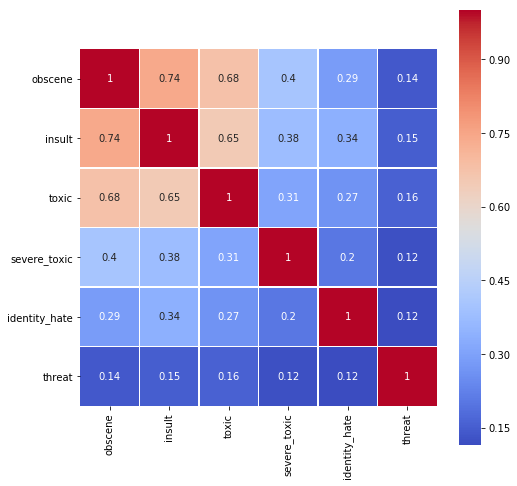

In [13]:
data = df_train[labels]

colormap = plt.cm.coolwarm
plt.figure(figsize = (8,8))

sns.heatmap(data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', 
            annot=True);

O quadro acima mostra que muitas das labels possuem correlação forte. Por exemplo, **insult - obscene** tem o valor mais alto em 0.74, seguido de **toxic - obscene** e **toxic - insult**.

Portanto, este problema não trata cada rótulo como um único problema de classificação separado, já que há correlação entre os vários rótulos.

## Pré-Processamento dos Dados

### Padronizando os Comentários

In [14]:
df_train['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [15]:
df_test['comment_text']

0         Yo bitch Ja Rule is more succesful then you'll...
1         == From RfC == \n\n The title is fine as it is...
2         " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3         :If you have a look back at the source, the in...
4                 I don't anonymously edit articles at all.
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 153164, dtype: object

In [16]:
def padroniza_df(df, func) :
    
    df = df.map(lambda coment : func(coment))
                
    return df

#### Função de padronização

In [17]:
import re

def padroniza_texto(texto):
    
    texto = texto.encode('ascii', errors = 'ignore').decode() #Decodificando caracteres em ASCII
    texto = texto.lower() #Apenas caracteres minúsculos
    texto = re.sub(r'http\S+', ' ', texto) #Evitando links
    texto = re.sub(r'#+', ' ', texto)
    texto = re.sub(r'@[A-Za-z0-9]+', ' ', texto)
    texto = re.sub(r"([A-Za-z]+)'s", r"\1 is", texto)
    texto = re.sub(r"what's", "what is ", texto) #Evitando contrações
    texto = re.sub(r"\'s", " ", texto) #Evitando contrações
    texto = re.sub(r"won't", "will not ", texto) #Evitando contrações
    texto = re.sub(r"\'ve", " have ", texto) #Evitando contrações
    texto = re.sub(r"can't", "can not ", texto) #Evitando contrações
    texto = re.sub(r"n't", " not ", texto) #Evitando contrações
    texto = re.sub(r"isn't", "is not ", texto) #Evitando contrações
    texto = re.sub(r"i'm", "i am ", texto) #Evitando contrações
    texto = re.sub(r"\'re", " are ", texto) #Evitando contrações
    texto = re.sub(r"\'d", " would ", texto) #Evitando contrações
    texto = re.sub(r"\'ll", " will ", texto) #Evitando contrações
    texto = re.sub(r"\'scuse", " excuse ", texto) #Evitando contrações
    texto = re.sub('\W', ' ', texto)
    texto = re.sub('\s+', ' ', texto)
    texto = re.sub(r'\d+', ' ', texto)
    texto = texto.strip(' ') #Removendo espaços do começo e fim 
    
    return texto

In [18]:
df_train['comment_text'] = padroniza_df(df_train['comment_text'], padroniza_texto)
df_test['comment_text'] = padroniza_df(df_test['comment_text'], padroniza_texto)

#### Função que remove as stopwords

In [19]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def remove_stopwords(texto):
    
    stop_words = set(stopwords.words('english')) 
  
    word_tokens = word_tokenize(texto) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
        
    return filtered_sentence

In [20]:
df_train['comment_text'] = padroniza_df(df_train['comment_text'], remove_stopwords)
df_test['comment_text'] = padroniza_df(df_test['comment_text'], remove_stopwords)

In [21]:
df_train['comment_text'].head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, matches, background, colour, seemingly, ...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestions, improvement, wondere...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

In [22]:
df_test['comment_text'].head()

0    [yo, bitch, ja, rule, succesful, ever, whats, ...
1                              [rfc, title, fine, imo]
2                     [sources, zawe, ashton, lapland]
3    [look, back, source, information, updated, cor...
4                        [anonymously, edit, articles]
Name: comment_text, dtype: object

## Resolvendo o Problema de *Multi-label Classification*

### Separando os dados de treino, teste e validação

#### X

In [23]:
X_train = df_train['comment_text']
X_test = df_test['comment_text']

In [24]:
X_train.shape, X_test.shape

((159571,), (153164,))

#### y

In [25]:
y_train = np.asarray(df_train[labels].values)

In [26]:
y_train.shape

(159571, 6)

### Processo de Tokenização

In [27]:
def word_count(vector):
    
    count = 0
    
    for word in vector :
        count += 1

    return count

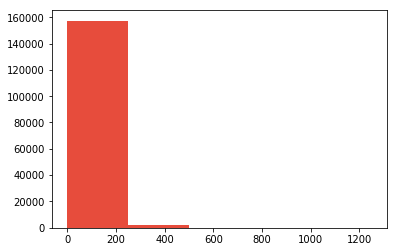

In [28]:
new_df_train = df_train
new_df_train['number_of_char'] = df_train['comment_text'].apply(lambda x: word_count(x))

hist = plt.hist(new_df_train['number_of_char'], bins=5, color='#e74c3c')

plt.show()

In [29]:
new_df_train.nlargest(5, 'number_of_char')

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,number_of_char
32143,5572234220e43ea2,"[pig, pig, pig, pig, pig, pig, pig, pig, pig, ...",1,0,0,0,0,0,1250
61793,a55e3736cb1c2db1,"[oh, noes, oh, noes, oh, noes, oh, noes, oh, n...",0,0,0,0,0,0,1250
76598,cd135d9358a9e9ea,"[die, fag, die, fag, die, fag, die, fag, die, ...",1,0,0,0,0,0,1250
150039,65d66bf057752682,"[lol, lol, lol, lol, lol, lol, lol, lol, lol, ...",0,0,0,0,0,0,1250
153353,9bb20c51c9fec236,"[fat, jew, fat, jew, fat, jew, fat, jew, fat, ...",1,0,0,0,1,1,1247


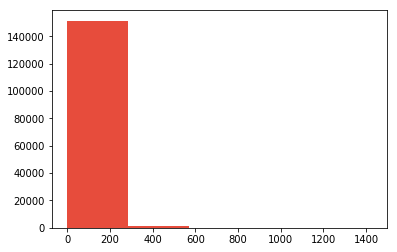

In [30]:
new_df_test = df_test
new_df_test['number_of_char'] = df_test['comment_text'].apply(lambda x: word_count(x))

hist = plt.hist(new_df_test['number_of_char'], bins=5, color='#e74c3c')

plt.show()

In [31]:
new_df_test.nlargest(5, 'number_of_char')

,id,comment_text,number_of_char
99492,a60d51188aad42f0,"[c, e, f, u, c, k, e, r, c, e, f, u, c, k, e, ...",1426
103213,ac48518c55e5119a,"[tommy, f, u, c, k, tommy, f, u, c, k, tommy, ...",1276
92218,99c004fa0ce49767,"[gay, gay, gay, gay, gay, gay, gay, gay, gay, ...",1250
131618,dbf71e38c680167e,"[gay, gay, gay, gay, gay, gay, gay, gay, gay, ...",1250
9850,107316331848721c,"[protecten, yur, profiel, befour, eye, vandeli...",1236


In [32]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


#### Treino

In [33]:
X_train_tokenizer = Tokenizer(num_words=1500)
X_train_tokenizer.fit_on_texts(X_train.values)

In [34]:
X_train_tokens = X_train_tokenizer.texts_to_sequences(X_train.values)
X_train_tokens = pad_sequences(X_train_tokens, maxlen=100)
                               
X_train_tokens

array([[   0,    0,    0, ...,    4,    2,   57],
       [   0,    0,    0, ...,    4,  798,   81],
       [   0,    0,    0, ...,  299,  570,  336],
       ...,
       [   0,    0,    0, ...,    0,  570,    1],
       [   0,    0,    0, ...,  264,   53,   62],
       [   0,    0,    0, ...,  368,  237, 1409]], dtype=int32)

In [35]:
X_train.shape, X_train_tokens.shape

((159571,), (159571, 100))

#### Teste

In [36]:
X_test_tokenizer = Tokenizer(num_words=1500)
X_test_tokenizer.fit_on_texts(X_test.values)

In [37]:
X_test_tokens = X_test_tokenizer.texts_to_sequences(X_test.values)
X_test_tokens = pad_sequences(X_test_tokens, maxlen=100)

X_test_tokens

array([[  0,   0,   0, ...,  56, 359,  17],
       [  0,   0,   0, ..., 896, 249, 496],
       [  0,   0,   0, ...,   0,   0,  27],
       ...,
       [  0,   0,   0, ..., 346, 292, 346],
       [  0,   0,   0, ..., 756, 183,  21],
       [  0,   0,   0, ..., 324, 179,  26]], dtype=int32)

In [38]:
X_test.shape, X_test_tokens.shape

((153164,), (153164, 100))

### Criação do Modelo

In [39]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense
from tensorflow.keras import Sequential

In [40]:
model = Sequential()
model.add(Embedding(input_dim=1500, output_dim=64))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [41]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(1e-4),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          96000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 170,694
Trainable params: 170,694
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train_tokens, y_train, batch_size=32, epochs=10, validation_split=0.02, shuffle=True)

Train on 156379 samples, validate on 3192 samples
Epoch 1/10
156379/156379 [==============================] - 74s 472us/sample - loss: 0.1012 - accuracy: 0.9699 - val_loss: 0.0649 - val_accuracy: 0.9778
Epoch 2/10
156379/156379 [==============================] - 68s 432us/sample - loss: 0.0621 - accuracy: 0.9795 - val_loss: 0.0621 - val_accuracy: 0.9787
Epoch 3/10
156379/156379 [==============================] - 68s 432us/sample - loss: 0.0606 - accuracy: 0.9799 - val_loss: 0.0616 - val_accuracy: 0.9796
Epoch 4/10
156379/156379 [==============================] - 69s 440us/sample - loss: 0.0597 - accuracy: 0.9800 - val_loss: 0.0610 - val_accuracy: 0.9794
Epoch 5/10
156379/156379 [==============================] - 69s 444us/sample - loss: 0.0589 - accuracy: 0.9803 - val_loss: 0.0608 - val_accuracy: 0.9793
Epoch 6/10
 57888/156379 [==========>...................] - ETA: 43s - loss: 0.0584 - accuracy: 0.9802

In [44]:
history.history

{'loss': [0.10122446399101444,
  0.06211502388930748,
  0.06055731112947213,
  0.059651527384540104,
  0.05893917025390638,
  0.0584259623148948,
  0.05793923622790981,
  0.057366331528858505,
  0.05676012711998979,
  0.0562503890548263],
 'accuracy': [0.9699279,
  0.9795387,
  0.9798822,
  0.9800222,
  0.9802831,
  0.98030907,
  0.98041785,
  0.9806145,
  0.98067904,
  0.98080415],
 'val_loss': [0.0649244826763196,
  0.06209092839553317,
  0.06163573418895628,
  0.06097343963871997,
  0.06080498908153901,
  0.060158261522781434,
  0.059713538355639854,
  0.05954413099872662,
  0.05920323631947949,
  0.058635099718631956],
 'val_accuracy': [0.9777568,
  0.97874916,
  0.9796369,
  0.9794281,
  0.9793234,
  0.9794279,
  0.97947997,
  0.9796365,
  0.9795322,
  0.9801066]}

In [45]:
y_test_pred = model.predict(X_test_tokens, batch_size=32, verbose=1)

153164/153164 [==============================] - 25s 163us/sample


## Preparando o Arquivo de Submissão

In [46]:
submission[labels] = y_test_pred

submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.006216,0.000027,0.000690,0.000043,0.001015,0.000191
1,0000247867823ef7,0.004117,0.000123,0.000994,0.000143,0.001245,0.000294
2,00013b17ad220c46,0.051739,0.001514,0.010164,0.001391,0.015718,0.003112
3,00017563c3f7919a,0.003731,0.000019,0.000521,0.000029,0.000562,0.000117
4,00017695ad8997eb,0.039753,0.001201,0.007696,0.001229,0.012880,0.002628


In [47]:
submission.to_csv('submission.csv', index=False)